In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Loading dataset
data = pd.read_excel("C:/Users/Asus/Downloads/fashion_data_2018_2022.xls")
data.head(10)

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,0.20,2018-01-28,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0.00,2018-01-28,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,0.05,2018-01-07,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,0.10,2018-01-01,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0.00,2018-01-28,126,1,2018
5,1006,Business Shirt,Female,Shirt,Plain,Brown,35-45,Spring,23.90,Denim,332,96,4.7,6,ZARA,0.15,2018-01-16,136,1,2018
6,1007,Casual Jeans,Female,Blouse,Plain,Beige,25-35,All,27.95,Denim,100,92,4.0,3,ZARA,0.10,2018-01-02,170,1,2018
7,1008,Heels,Male,Shoes,Geometric,Beige,25-35,Autumn,87.09,Viscose,333,97,3.2,3,ZARA,0.00,2018-01-03,128,1,2018
8,1009,Beach Shirt,Female,Shirt,Polka Dots,Brown,35-45,All,97.10,Denim,424,68,3.5,6,ZARA,0.10,2018-01-14,193,1,2018
9,1010,Pattern Skirt,Female,Jeans,Plain,Brown,35-45,Summer,42.82,Synthetic,335,33,4.1,6,ZARA,0.00,2018-01-21,248,1,2018


In [12]:
data.info()
data=data.iloc[:500,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          660 non-null    int64         
 1   product_name        660 non-null    int32         
 2   gender              660 non-null    int32         
 3   category            660 non-null    int32         
 4   pattern             660 non-null    int32         
 5   color               660 non-null    int32         
 6   age_group           660 non-null    int32         
 7   season              660 non-null    int32         
 8   price               660 non-null    float64       
 9   material            660 non-null    int32         
 10  sales_count         660 non-null    float64       
 11  reviews_count       660 non-null    float64       
 12  average_rating      660 non-null    float64       
 13  out_of_stock_times  660 non-null    int64         

In [13]:
# Encoding
label_encoders = {}
categorical_columns = ['product_name', 'gender', 'category', 'pattern', 'color', 'age_group', 'season', 'brand', 'material']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,1,1,4,1,10,1,2,-0.388567,4,-1.441081,0.120777,1.605494,3,0,1.382307,2018-01-28,1.033626,1,2018
1,1002,3,1,2,4,0,0,3,0.176145,6,0.230259,-1.577956,-0.937754,6,0,-1.477638,2018-01-28,1.033626,1,2018
2,1003,9,0,1,1,2,0,0,1.185072,6,-1.630146,-1.280678,0.515531,4,0,-0.762652,2018-01-07,-1.527931,1,2018
3,1004,8,1,6,3,10,1,0,0.825710,0,1.281463,0.460524,1.060513,3,0,-0.047666,2018-01-01,0.336604,1,2018
4,1005,4,1,4,3,0,2,4,1.077609,5,-1.410830,-1.110804,-0.756093,4,0,-1.477638,2018-01-28,-0.447546,1,2018


In [14]:
# Standardizing
numerical_columns = ['price', 'sales_count', 'reviews_count', 'average_rating', 'discount', 'wish_list_count']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,1,1,4,1,10,1,2,-0.403112,4,-1.439352,0.110344,1.610227,3,0,1.359333,2018-01-28,1.047681,1,2018
1,1002,3,1,2,4,0,0,3,0.163342,6,0.236606,-1.587250,-0.989309,6,0,-1.523664,2018-01-28,1.047681,1,2018
2,1003,9,0,1,1,2,0,0,1.175383,6,-1.628940,-1.290171,0.496140,4,0,-0.802915,2018-01-07,-1.539490,1,2018
3,1004,8,1,6,3,10,1,0,0.814912,0,1.290715,0.449862,1.053184,3,0,-0.082165,2018-01-01,0.343689,1,2018
4,1005,4,1,4,3,0,2,4,1.067589,5,-1.409018,-1.120412,-0.803628,4,0,-1.523664,2018-01-28,-0.448302,1,2018


In [15]:
X = data.drop(['product_id', 'last_stock_date'], axis=1)
y = data['sales_count']

# Split data into train and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.00010131989506538632


In [17]:
import numpy as np
# Calculate the absolute errors
errors = abs(y_pred - y_test)
round(np.mean(errors),2)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [18]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (mse/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:',round(accuracy), '%.')

Accuracy: 100 %.


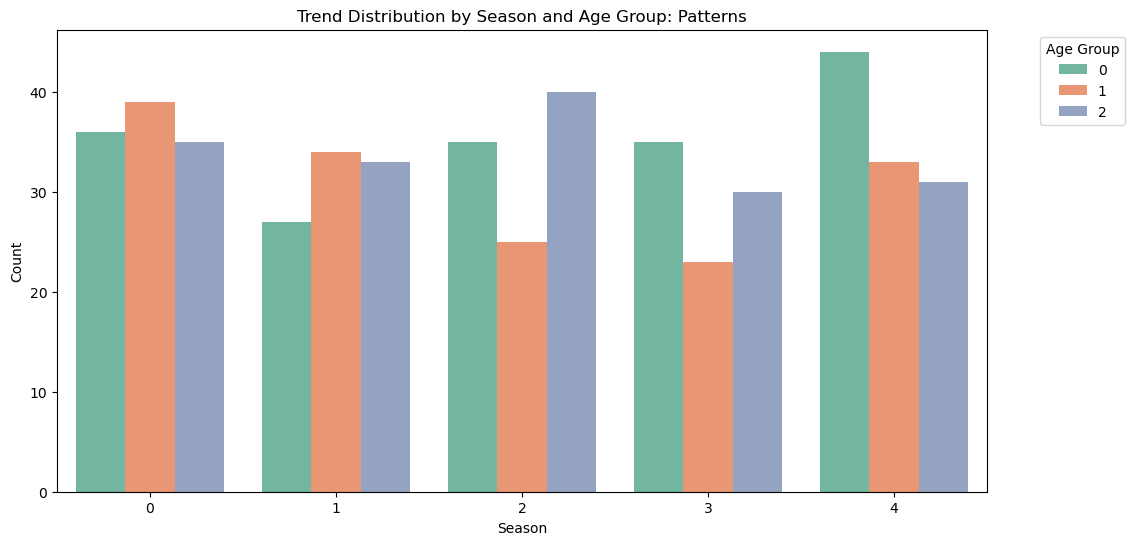

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
#patterns by season and age group
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='season', hue='age_group', palette='Set2')
plt.title('Trend Distribution by Season and Age Group: Patterns')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



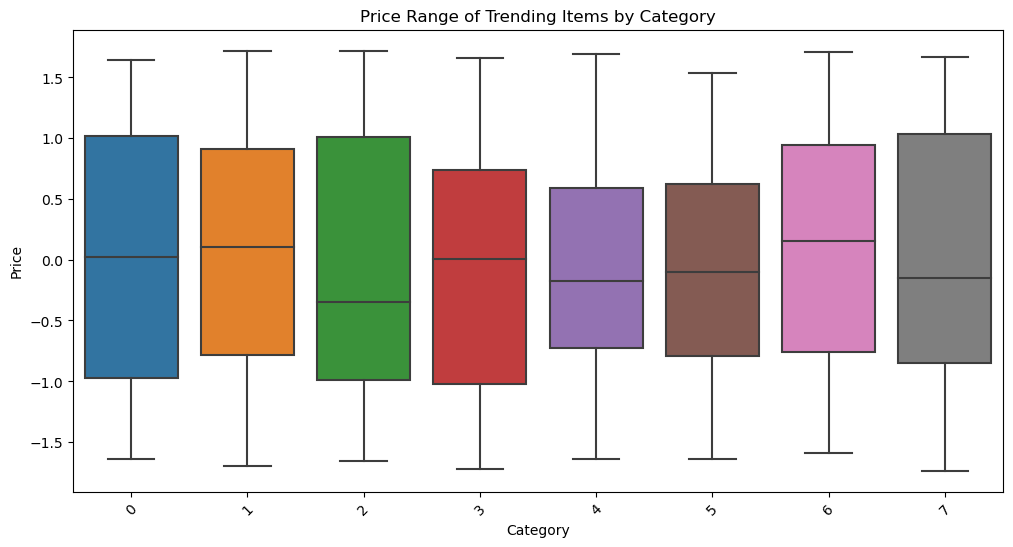

In [20]:
#price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='category', y='price')
plt.title('Price Range of Trending Items by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_16036\902471419.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='gender', y='sales_count', hue='category', estimator=sum, ci=None)


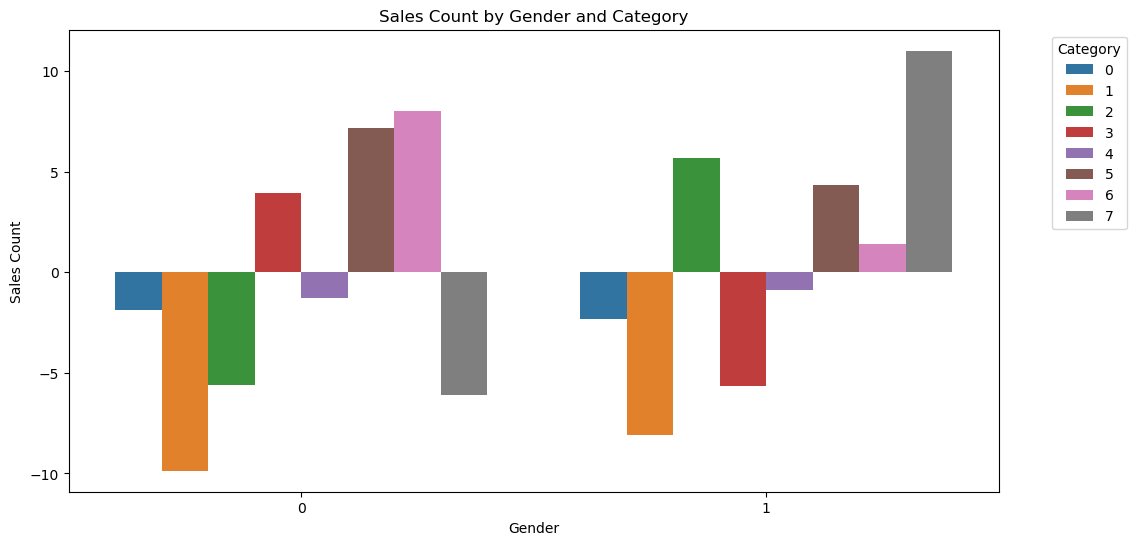

In [21]:


#sales count by gender and category
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='gender', y='sales_count', hue='category', estimator=sum, ci=None)
plt.title('Sales Count by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Sales Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


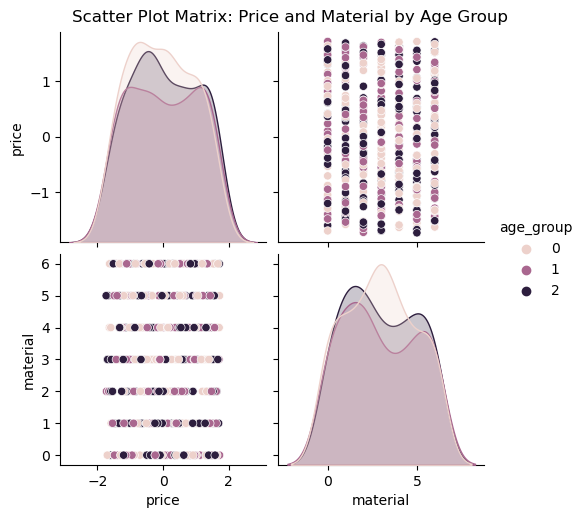

In [22]:
#price and material by age group
sns.pairplot(data=data, vars=['price', 'material'], hue='age_group')
plt.suptitle('Scatter Plot Matrix: Price and Material by Age Group', y=1.02)
plt.show()


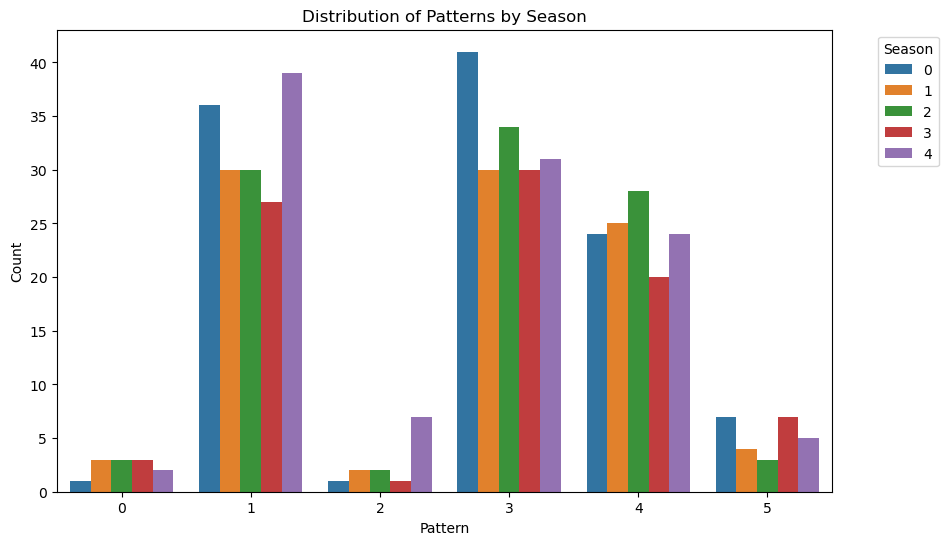

In [23]:
#patterns by season
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='pattern', hue='season')
plt.title('Distribution of Patterns by Season')
plt.xlabel('Pattern')
plt.ylabel('Count')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


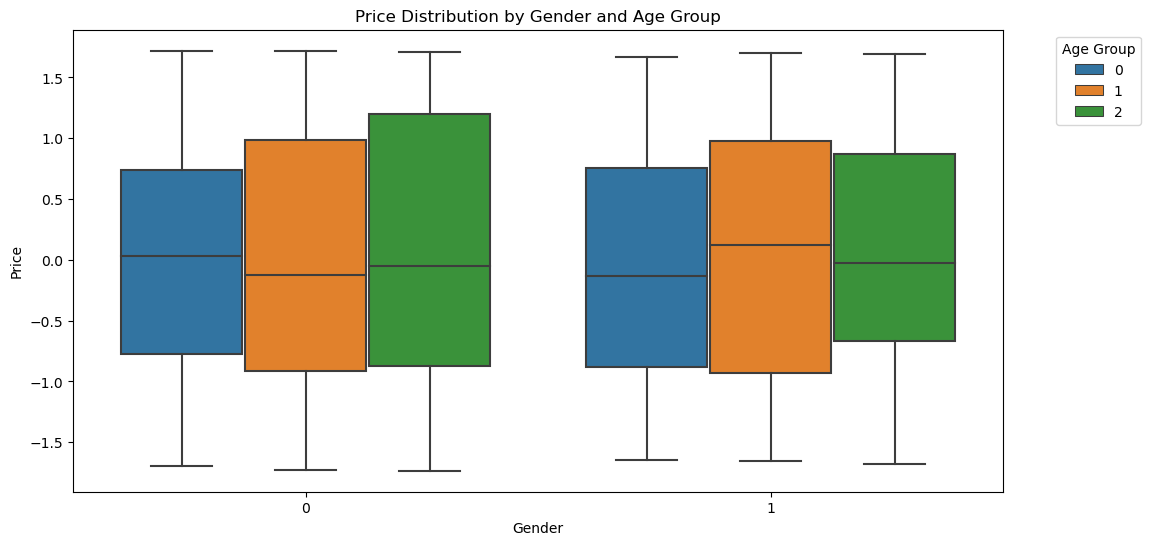

In [24]:
#price distribution by gender and age group
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='gender', y='price', hue='age_group')
plt.title('Price Distribution by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_16036\2622410968.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sales = data.groupby(data['last_stock_date'].dt.year).sum().reset_index()


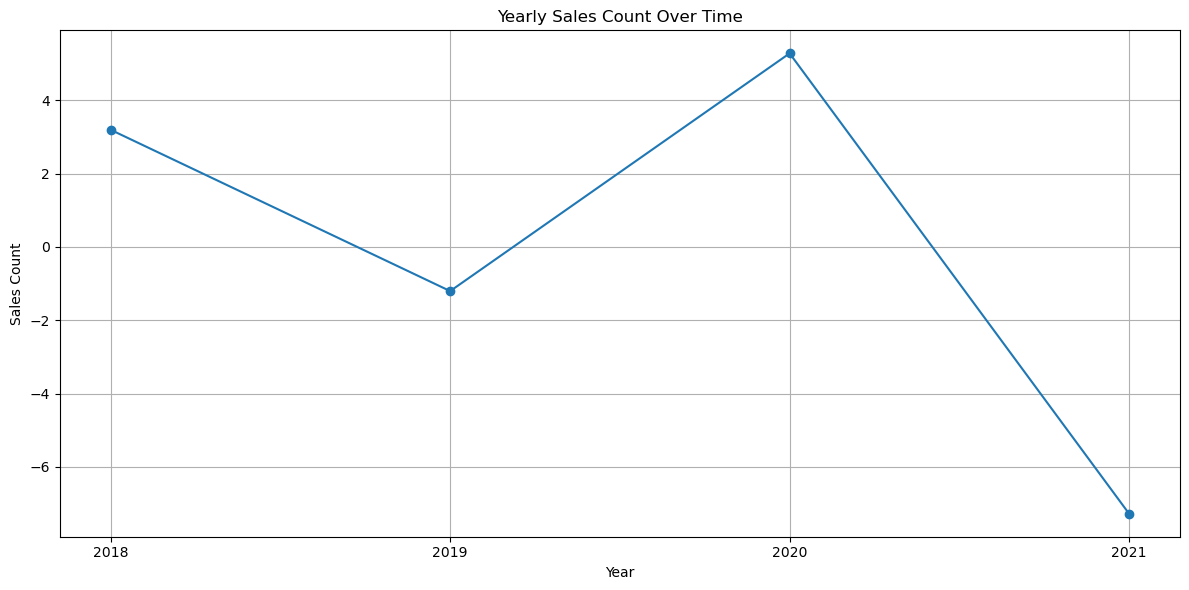

C:\Users\Asus\AppData\Local\Temp\ipykernel_16036\2622410968.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='category', y='sales_count', estimator=sum, ci=None)


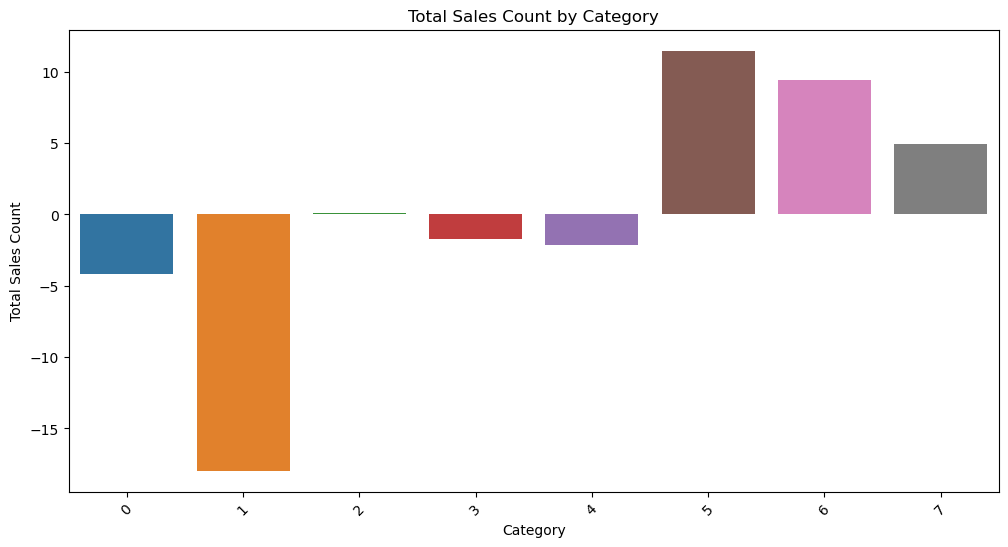

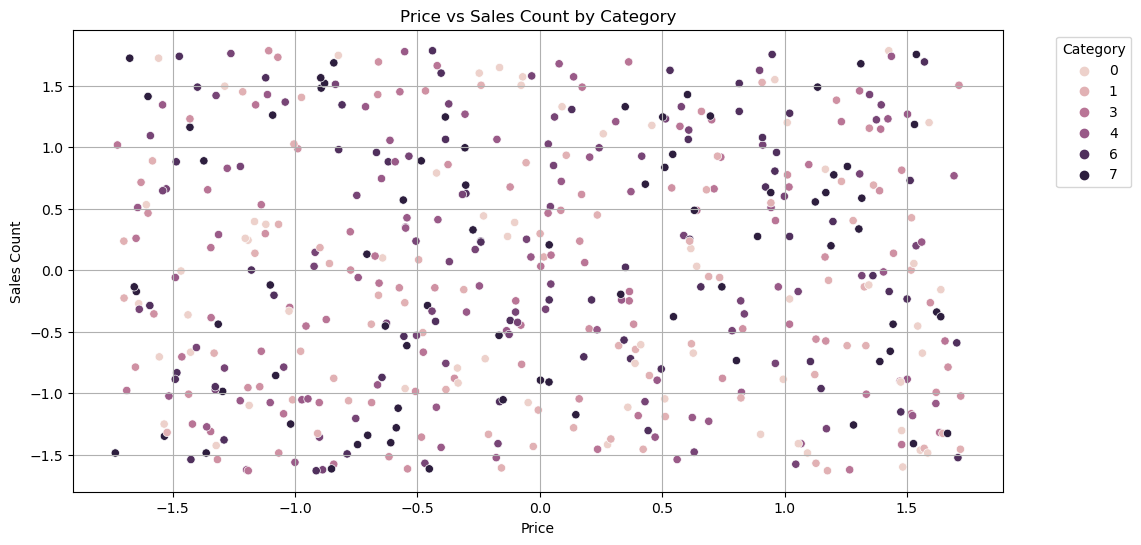

In [26]:
#timeseries
data['last_stock_date'] = pd.to_datetime(data['last_stock_date'])

#Yearly Sales Count Over Time
yearly_sales = data.groupby(data['last_stock_date'].dt.year).sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['last_stock_date'], yearly_sales['sales_count'], marker='o')
plt.title('Yearly Sales Count Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.xticks(yearly_sales['last_stock_date'])
plt.grid(True)
plt.tight_layout()
plt.show()

#Total Sales Count by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='category', y='sales_count', estimator=sum, ci=None)
plt.title('Total Sales Count by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Count')
plt.xticks(rotation=45)
plt.show()

#Price vs Sales Count by Category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='price', y='sales_count', hue='category')
plt.title('Price vs Sales Count by Category')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

